In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt

from scipy import stats


import sklearn 
import datetime

In [3]:
# Display

pd.set_option('max_colwidth', 800)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# reading dataset
dataset_path = './dataset/train/train.csv'
df = pd.read_csv(dataset_path)
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b752eebc9b50313e152,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce,7.706428
1,03930f033646d073462b35d411616323597715ac4fc3982021ff25387177a782,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf11ea2bb87c4b0100a4,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04782dcd41548b3974b5,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb294ba12c85962b0a9842,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,7.059346


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

In [6]:
df.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


### checking for missing values

In [7]:
df.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

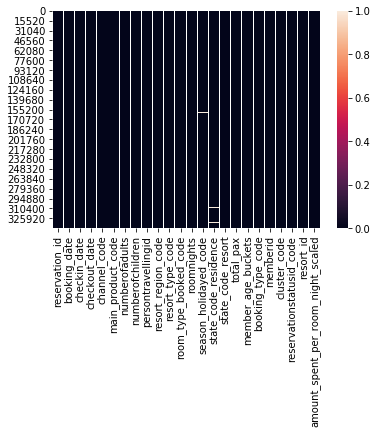

In [8]:
sns.heatmap(df.isnull())

### Imputing values and scaling target variable

In [9]:
df['season_holidayed_code'] = df['season_holidayed_code'].fillna(5)

In [10]:
df['state_code_residence'] = df['state_code_residence'].fillna(-1)

In [11]:
df['target'] = df['amount_spent_per_room_night_scaled'] *100
df['target'][:10]

0    770.642846
1    666.256293
2    787.160208
3    534.494329
4    705.934611
5    816.770663
6    644.983831
7    704.617197
8    539.420314
9    656.141249
Name: target, dtype: float64

### Data preprocessing

In [12]:
# converting to datetime object
date_col_li = ['booking_date', 'checkin_date', 'checkout_date']

for da in date_col_li:
    df[da] = pd.to_datetime(df[da],dayfirst=True,format='%d/%m/%y')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# selecting object column 

object_col_li = df.select_dtypes(include='object').columns

object_col_li = object_col_li[1:]
object_col_li

Index(['member_age_buckets', 'memberid', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],
      dtype='object')

In [15]:
from collections import defaultdict

le = defaultdict(LabelEncoder)

for col in object_col_li:
    df[col] = le[col].fit_transform(df[col])

df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b752eebc9b50313e152,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,5,1,24179,5,2,7,7.706428,770.642846
1,03930f033646d073462b35d411616323597715ac4fc3982021ff25387177a782,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,5,1,24179,5,0,1,6.662563,666.256293
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf11ea2bb87c4b0100a4,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,5,1,24179,4,0,9,7.871602,787.160208
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04782dcd41548b3974b5,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,5,1,24179,3,0,25,5.344943,534.494329
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb294ba12c85962b0a9842,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,5,1,24179,3,0,25,7.059346,705.934611


In [16]:
le

defaultdict(sklearn.preprocessing.label.LabelEncoder,
            {'member_age_buckets': LabelEncoder(),
             'memberid': LabelEncoder(),
             'cluster_code': LabelEncoder(),
             'reservationstatusid_code': LabelEncoder(),
             'resort_id': LabelEncoder()})

In [17]:
# with open('label_encoders.pkl','wb') as f:
#     pkl.dump(le,f)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 25 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null datetime64[ns]
checkin_date                          341424 non-null datetime64[ns]
checkout_date                         341424 non-null datetime64[ns]
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341424 non-null float64
state_code_residenc

In [19]:
df.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.674639,7.145444,4.763303,3.193390,4.102433,1.124209,50707.402886,3.290252,0.126166,17.315734,7.720801,772.080105
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.886521,4.767866,3.103909,1.167824,1.909182,0.329821,29259.826780,1.684267,0.439366,8.630901,1.090109,109.010913
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600397,160.039717
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,3.000000,1.000000,25305.000000,2.000000,0.000000,10.000000,7.187260,718.726026
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,4.000000,1.000000,50721.500000,4.000000,0.000000,18.000000,7.860814,786.081372
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,5.000000,1.000000,75992.250000,5.000000,0.000000,25.000000,8.419144,841.914376
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,5.000000,38.000000,13.000000,24.000000,9.000000,2.000000,101326.000000,5.000000,3.000000,31.000000,10.816652,1081.665194


In [20]:
df.select_dtypes(include='datetime64').describe()

,booking_date,checkin_date,checkout_date
count,341424,341424,341424
unique,1621,1532,1531
top,2016-09-02 00:00:00,2016-10-08 00:00:00,2018-10-21 00:00:00
freq,1353,460,491
first,2014-09-03 00:00:00,2012-03-08 00:00:00,2012-03-11 00:00:00
last,2019-03-01 00:00:00,2019-03-01 00:00:00,2019-03-03 00:00:00


In [21]:
df.select_dtypes(include='datetime64').head(100)

,booking_date,checkin_date,checkout_date
0,2018-04-05,2018-04-05,2018-04-06
1,2015-01-23,2015-04-11,2015-04-16
2,2015-01-28,2015-02-01,2015-02-05
3,2015-05-02,2015-06-11,2015-06-16
4,2015-09-02,2015-12-14,2015-12-19
5,2015-12-01,2016-01-12,2016-01-13
6,2016-01-20,2016-01-20,2016-01-21
7,2016-08-22,2016-10-20,2016-10-25
8,2016-09-10,2016-09-18,2016-09-24
9,2016-08-03,2016-11-21,2016-11-24


In [22]:
df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'target'],
      dtype='object')

In [23]:
for col in df.columns:
    print(col,df[col].nunique())

reservation_id 341424
booking_date 1621
checkin_date 1532
checkout_date 1531
channel_code 3
main_product_code 5
numberofadults 28
numberofchildren 12
persontravellingid 6
resort_region_code 3
resort_type_code 7
room_type_booked_code 6
roomnights 44
season_holidayed_code 5
state_code_residence 38
state_code_resort 11
total_pax 18
member_age_buckets 10
booking_type_code 2
memberid 101327
cluster_code 6
reservationstatusid_code 4
resort_id 32
amount_spent_per_room_night_scaled 278083
target 278083


In [24]:
value_counts_li = [col for col in df.columns if df[col].nunique()<13]
value_counts_li

['channel_code',
 'main_product_code',
 'numberofchildren',
 'persontravellingid',
 'resort_region_code',
 'resort_type_code',
 'room_type_booked_code',
 'season_holidayed_code',
 'state_code_resort',
 'member_age_buckets',
 'booking_type_code',
 'cluster_code',
 'reservationstatusid_code']

### ANOVA testing

#### higher disparity score means better variable for prediction of target

<module 'matplotlib.pyplot' from '/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

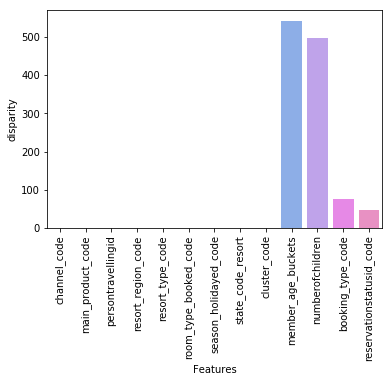

In [35]:
def anova(df):
    anv = pd.DataFrame()
    anv['Features'] = value_counts_li
    pvals = []
    
    for col in value_counts_li:        
        sample = []
        for cls in df[col].unique():
            s = df[df[col]==cls]['amount_spent_per_room_night_scaled'].values
            sample.append(s)
        pval = stats.f_oneway(*sample)[1]
        pvals.append(pval)
    
    anv['pval']=pvals
    
    return anv.sort_values('pval')
    

k = anova(df)
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'Features', y='disparity') 
plt.xticks(rotation=90) 
plt

In [25]:
for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df[col].value_counts().sort_index())
    print()
    

*******************channel_code*******************
1    161225
2     52157
3    128042
Name: channel_code, dtype: int64

****************main_product_code*****************
1     57822
2    177615
3     86247
4     18619
7      1121
Name: main_product_code, dtype: int64

*****************numberofchildren*****************
0     264250
1      37766
2      35164
3       2137
4       1658
5        181
6        187
7         20
8         44
10        14
12         2
13         1
Name: numberofchildren, dtype: int64

****************persontravellingid****************
45      267307
46       30569
47       31580
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

****************resort_region_code****************
1    143790
2    131361
3     66273
Name: resort_region_code, dtype: int64

*****************resort_type_code*****************
0      4462
1    154324
2     74154
3     48681
4     21619
5     26706
7     11478
Name: resort_type_code, dtype: int64

***

### Plotting different values

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


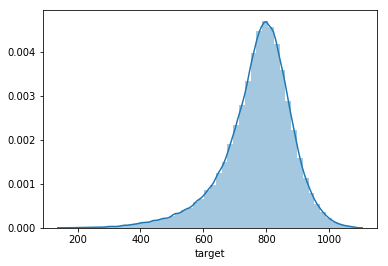

In [26]:
# Histogram of the target variable

sns.distplot(df['target'])

In [27]:
df['target'].skew()

-0.9232293889747926

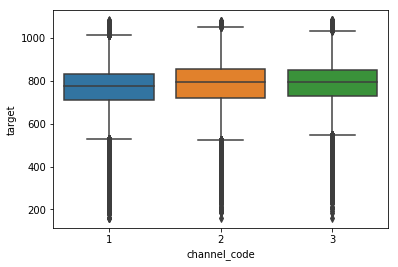

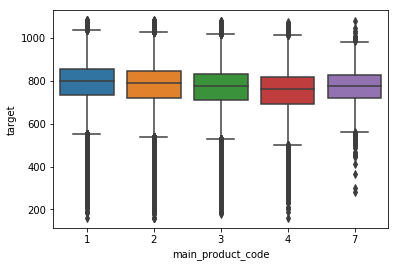

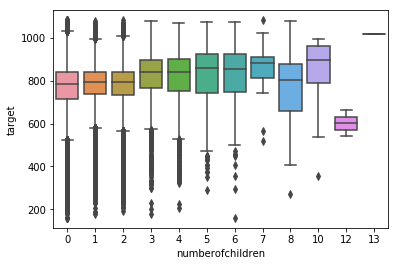

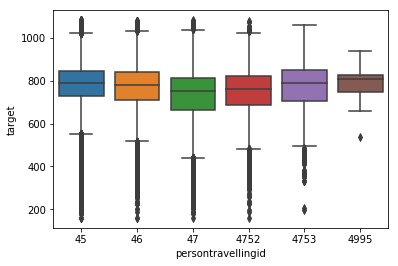

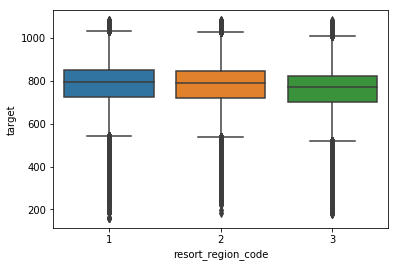

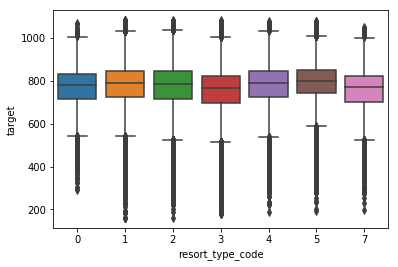

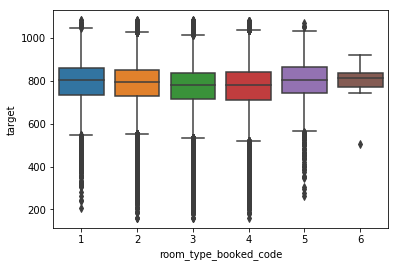

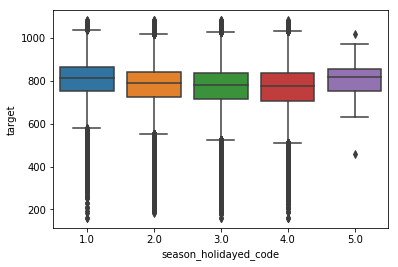

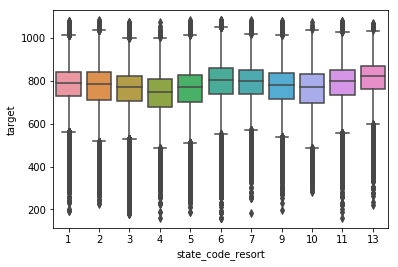

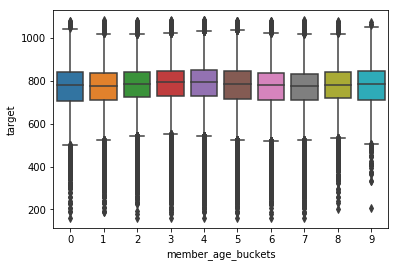

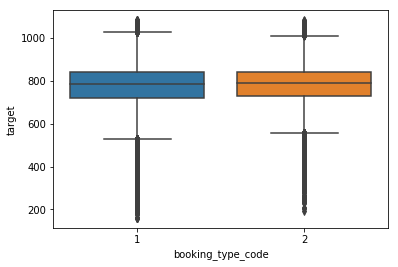

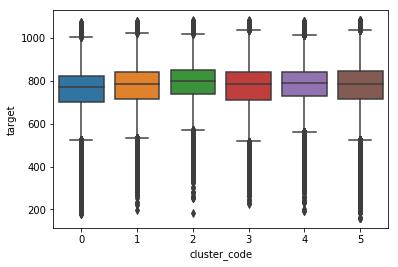

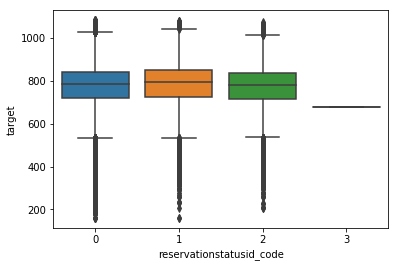

In [36]:
# box plot of all the value_counts list


#f,axes = plt.subplots(6,2,figsize = (15,15))

for i,col in enumerate(value_counts_li):
    sns.boxplot(x=col,y='target',data=df)
    plt.show()

In [37]:
# Printing average values

for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df.groupby(col)['target'].mean().sort_values())
    print()


*******************channel_code*******************
channel_code
1    761.811066
2    778.007651
3    782.595897
Name: target, dtype: float64

****************main_product_code*****************
main_product_code
4    747.955682
3    763.408768
7    769.833723
2    774.151372
1    786.463552
Name: target, dtype: float64

*****************numberofchildren*****************
numberofchildren
12     602.011436
8      759.088293
0      769.473967
2      778.423505
1      780.021146
4      807.654400
5      808.129950
3      814.206014
6      816.761938
10     833.093864
7      853.893926
13    1019.117631
Name: target, dtype: float64

****************persontravellingid****************
persontravellingid
47      731.310264
4752    746.301638
46      766.946061
4753    767.609829
45      778.524391
4995    780.993474
Name: target, dtype: float64

****************resort_region_code****************
resort_region_code
3    754.162361
2    774.362691
1    778.253135
Name: target, dtype: float64

***

In [38]:
# printing median values 

for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df.groupby(col)['target'].median().sort_values())
    print()    

*******************channel_code*******************
channel_code
1    777.198189
3    794.629816
2    794.751949
Name: target, dtype: float64

****************main_product_code*****************
main_product_code
4    763.551642
7    776.664004
3    777.110504
2    788.729996
1    800.014072
Name: target, dtype: float64

*****************numberofchildren*****************
numberofchildren
12     602.011436
0      783.099978
2      793.131845
1      793.144417
8      804.266533
3      838.402059
4      840.283509
6      856.353560
5      859.686260
7      882.704423
10     895.525313
13    1019.117631
Name: target, dtype: float64

****************persontravellingid****************
persontravellingid
47      749.763789
4752    761.904070
46      779.933793
4753    786.980492
45      791.150729
4995    809.756476
Name: target, dtype: float64

****************resort_region_code****************
resort_region_code
3    769.320357
2    788.169114
1    792.350792
Name: target, dtype: float64

***

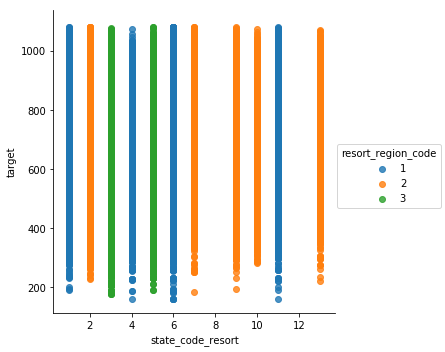

In [30]:
sns.lmplot('state_code_resort','target',df,fit_reg=False,hue='resort_region_code',size=5)

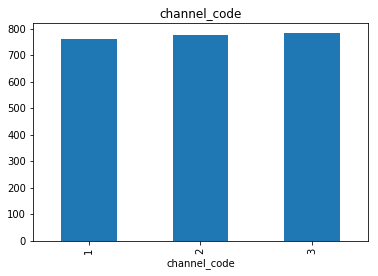

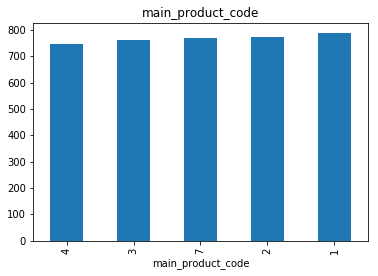

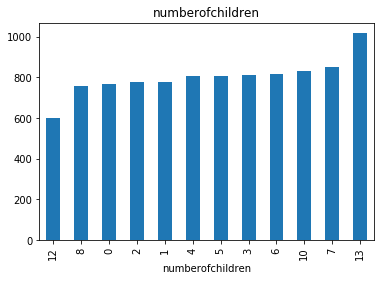

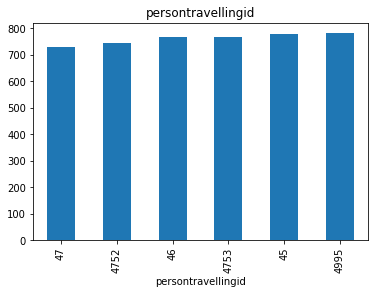

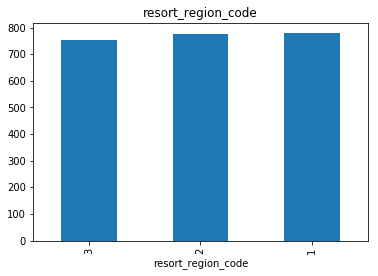

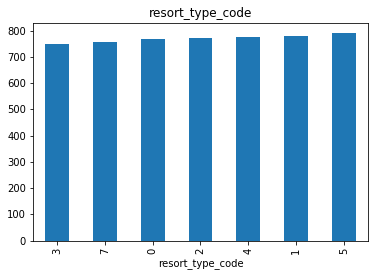

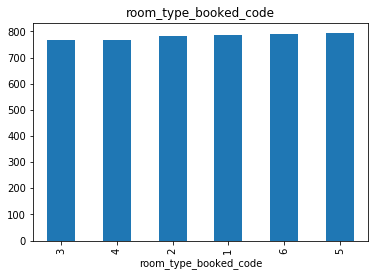

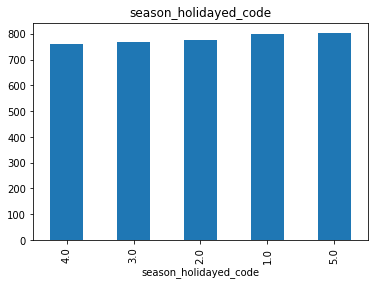

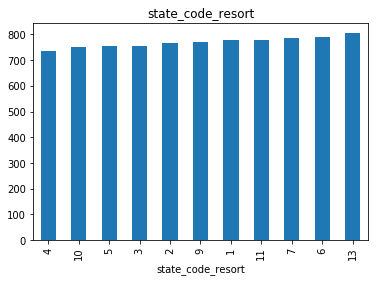

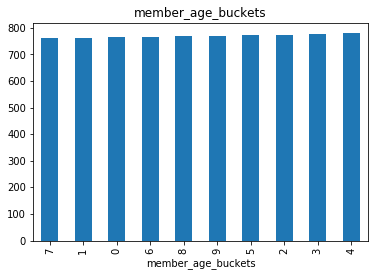

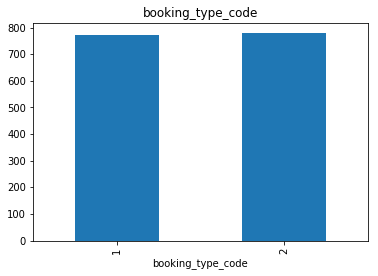

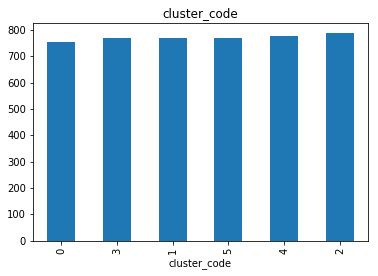

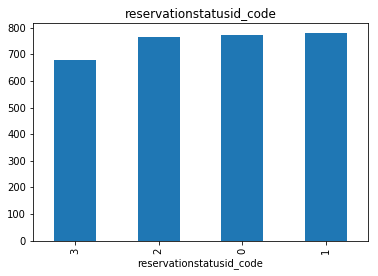

In [39]:
# creating lineplots

for col in value_counts_li:
    df.groupby(col)['target'].mean().sort_values().plot.bar()
    plt.title(col)
    plt.show()

In [ ]:
for col in value_counts_li:
    df.groupby(col)['target'].median().sort_values().plot.bar()
    plt.title(col)
    plt.show()

### Feature Engg

In [ ]:
df.columns

In [ ]:
# No of days in advance the booking is done

df['advance_booking_day'] = df['checkin_date']-df['booking_date']
df.head()

In [ ]:
# no of days stay

df['days_stay'] = (df['checkout_date']-df['checkin_date'])
df.head()

In [ ]:
wrong_booking_checking_date_ind = df[df['advance_booking_day'].dt.days<0].index
wrong_booking_checking_date_ind

In [ ]:
# type(df[df['advance_booking_day'].dt.days<0][col])

In [ ]:
# df_alter_year = df[df['advance_booking_day'].dt.days<0]
# for col in ['checkin_date','checkout_date']:
#     for row in df_alter_year[col]:
#         row = row.replace(year=2018)
#         print(row)

In [ ]:
df[df['advance_booking_day'].dt.days<0]

In [ ]:
# distribution of people booking in advance

sns.distplot(df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].dt.days)

In [ ]:
df['advance_booking_day'].nunique()

In [ ]:
df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].value_counts().sort_index()


In [ ]:
plt.plot(df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].value_counts().sort_index().index.days,df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].value_counts().sort_index())
plt.show()

In [ ]:
df[df['advance_booking_day'].dt.days>-1].groupby('advance_booking_day')['target'].mean()

In [ ]:
# mean spend vs advance booking day


plt.plot(df[df['advance_booking_day'].dt.days>-1].groupby('advance_booking_day')['target'].mean().index.days,df[df['advance_booking_day'].dt.days>-1].groupby('advance_booking_day')['target'].mean())
plt.title('advance_booking_day')
plt.show()

In [ ]:
df['days_stay'].nunique()

In [ ]:
df['days_stay'].value_counts()

In [ ]:
df['days_stay'].value_counts().plot.bar()

In [ ]:
len(df[df['days_stay'].dt.days<8])

In [ ]:
df.groupby('days_stay')['target'].mean()

In [ ]:
# mean_spend vs days stayed

plt.plot(df.groupby('days_stay')['target'].mean().index.days,df.groupby('days_stay')['target'].mean())